### Importação dos dados



In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento


Realizando o calculo do faturamento de cada loja

In [3]:
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

In [4]:
print(f"Faturamento Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")

Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


### Comparação de Faturamento por Loja

In [5]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

In [6]:
# Média do faturamento
media_faturamento = sum(faturamentos) / len(faturamentos)
# Total do faturamento
total_faturamento = sum(faturamentos)

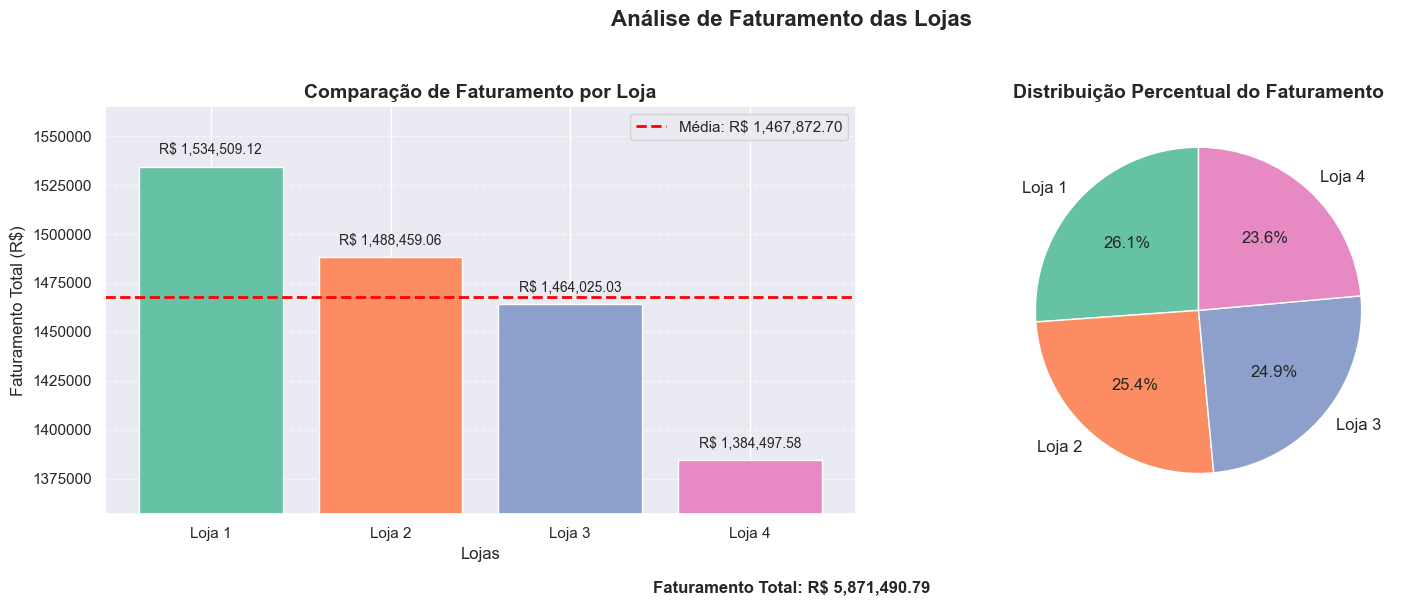

In [192]:
# Estilo
sns.set(style='darkgrid')
cores = sns.color_palette('Set2')

# Criar figura com duas colunas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras (à esquerda)
axes[0].bar(lojas, faturamentos, color=cores)
axes[0].axhline(media_faturamento, color='red', linestyle='--', linewidth=2, label=f'Média: R$ {media_faturamento:,.2f}')
axes[0].set_title('Comparação de Faturamento por Loja', fontsize=14, weight='bold')
axes[0].set_xlabel('Lojas', fontsize=12)
axes[0].set_ylabel('Faturamento Total (R$)', fontsize=12)
axes[0].ticklabel_format(style='plain', axis='y')
ymin = min(faturamentos) * 0.98
ymax = max(faturamentos) * 1.02
axes[0].set_ylim(ymin, ymax)
offset = ymax * 0.003
for i, valor in enumerate(faturamentos):
    axes[0].text(i, valor + offset, f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)
axes[0].legend()

# Gráfico de pizza (à direita)
axes[1].pie(faturamentos, labels=lojas, autopct=lambda p: f'{p:.1f}%', startangle=90,
            colors=cores, textprops={'fontsize': 12})
axes[1].set_title('Distribuição Percentual do Faturamento', fontsize=14, weight='bold')

# Título geral e valor total abaixo
fig.suptitle('Análise de Faturamento das Lojas', fontsize=16, weight='bold')
fig.text(0.5, 0.01, f'Faturamento Total: R$ {total_faturamento:,.2f}', ha='center', fontsize=12, weight='bold')

plt.savefig('grafico.png', dpi=300)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 2. Vendas por Categoria


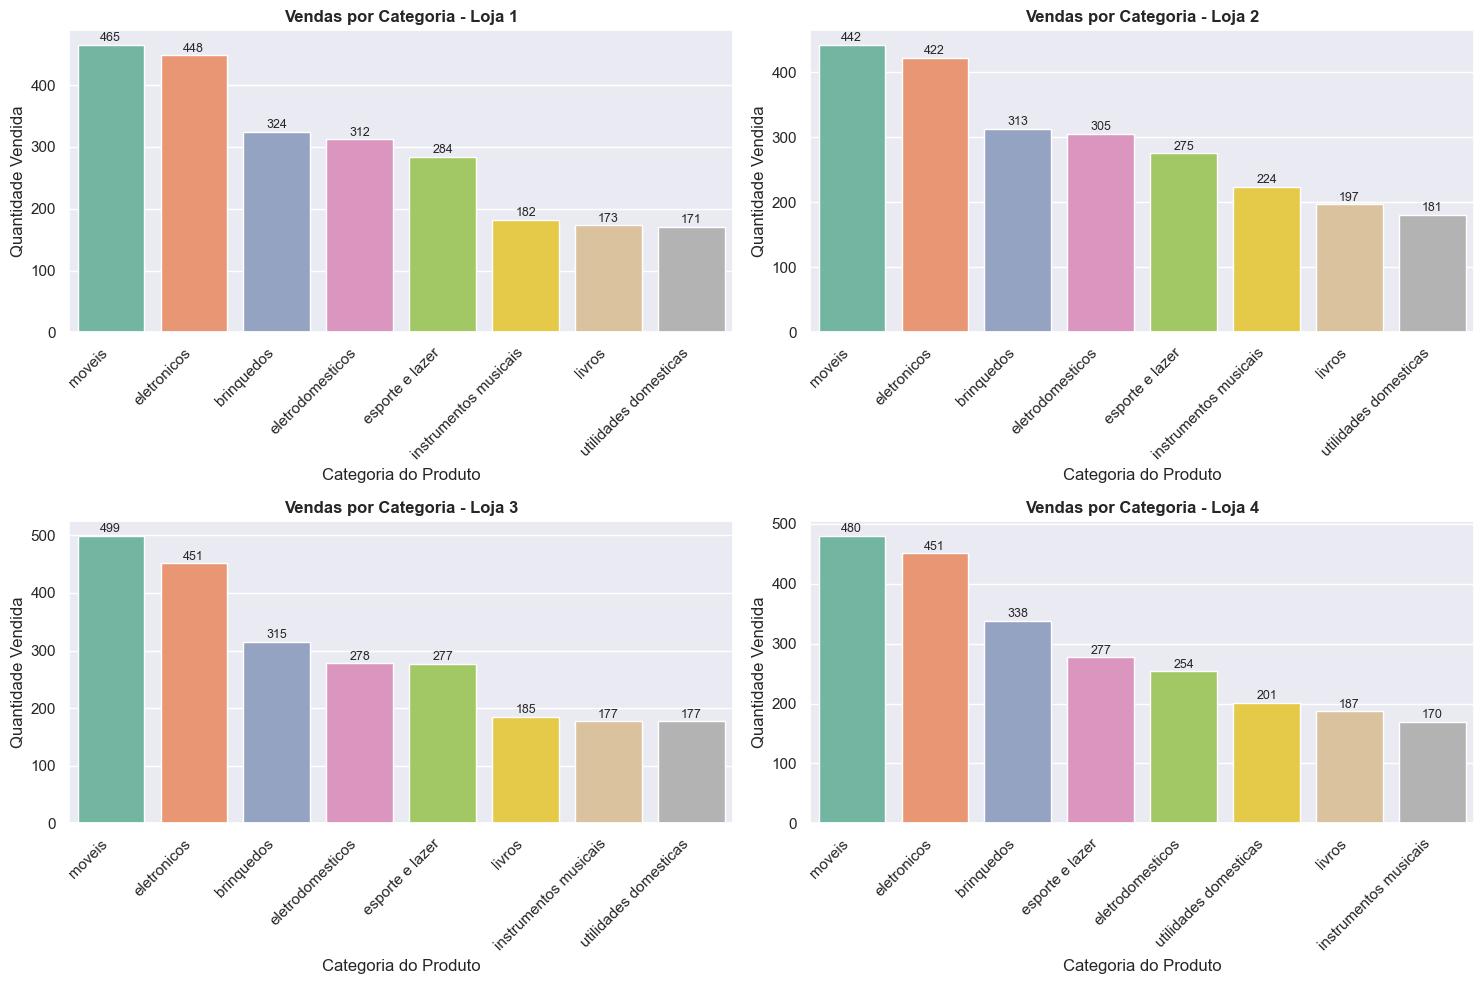

In [194]:
cores = sns.color_palette('Set2')
sns.set(style="darkgrid")

def grafico_vendas_categoria_subplot(df, loja, ax, cores):
    contagem_categoria = df['Categoria do Produto'].value_counts()
    
    sns.barplot(
        x=contagem_categoria.index,
        y=contagem_categoria.values,
        hue=contagem_categoria.index,
        palette=cores[:len(contagem_categoria)],  # Garante que as cores combinem com o número de categorias
        legend=False,
        ax=ax
    )

    ax.set_title(f'Vendas por Categoria - {loja}', fontsize=12, weight='bold')
    ax.set_xlabel('Categoria do Produto')
    ax.set_ylabel('Quantidade Vendida')
    ax.tick_params(axis='x', rotation=45)

    # Alinhamento dos rótulos do eixo x
    for label in ax.get_xticklabels():
        label.set_ha('right')

    # Adiciona os valores nas barras
    for i, valor in enumerate(contagem_categoria.values):
        ax.text(i, valor + 1, f'{valor}', ha='center', va='bottom', fontsize=9)

# Criação dos subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

# Gráficos para cada loja
grafico_vendas_categoria_subplot(loja1, 'Loja 1', axs[0], cores)
grafico_vendas_categoria_subplot(loja2, 'Loja 2', axs[1], cores)
grafico_vendas_categoria_subplot(loja3, 'Loja 3', axs[2], cores)
grafico_vendas_categoria_subplot(loja4, 'Loja 4', axs[3], cores)

plt.subplots_adjust(hspace=0.6, wspace=0.4)  # hspace: espaço vertical, wspace: horizontal

plt.savefig('grafico.png', dpi=300)

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

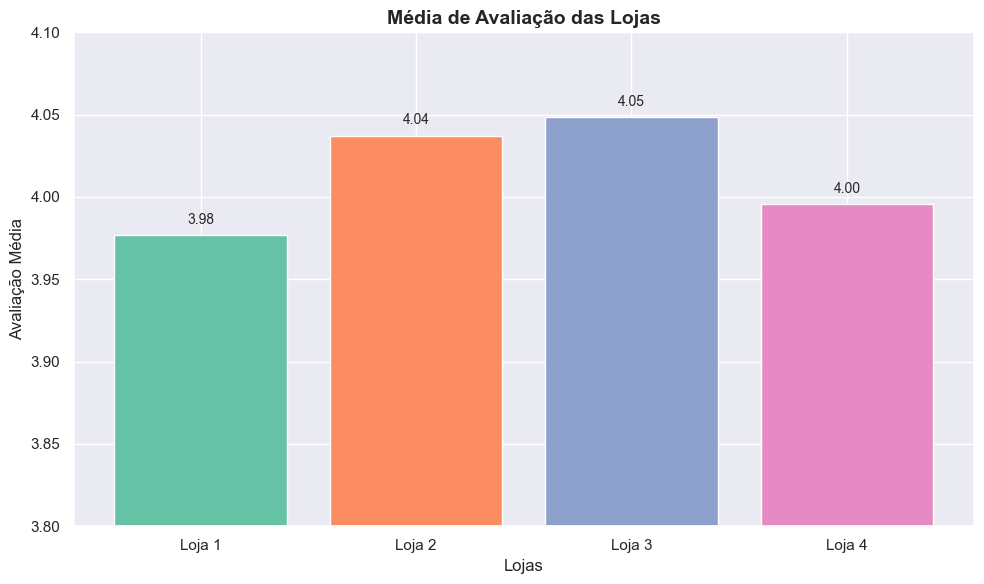

In [203]:
media_avaliacao_loja1 = loja1['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

sns.set(style="darkgrid")
cores = sns.color_palette('Set2')

# Dicionário com as médias 
avaliacoes_lojas = {
    'Loja 1': media_avaliacao_loja1,
    'Loja 2': media_avaliacao_loja2,
    'Loja 3': media_avaliacao_loja3,
    'Loja 4': media_avaliacao_loja4
}

# Dados separados
lojas = list(avaliacoes_lojas.keys())
medias = list(avaliacoes_lojas.values())

# Criação do gráfico
plt.figure(figsize=(10, 6))
barras = plt.bar(lojas, medias, color=cores)

# Título e eixos
plt.title('Média de Avaliação das Lojas', fontsize=14, weight='bold')
plt.xlabel('Lojas')
plt.ylabel('Avaliação Média')
plt.ylim(3.8, 4.1)  # Aproxima o eixo Y aos valores das médias

# Adiciona os valores acima das barras
for i, valor in enumerate(medias):
    plt.text(i, valor + 0.005, f'{valor:.2f}', ha='center', va='bottom', fontsize=10)

plt.savefig('grafico.png', dpi=300)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

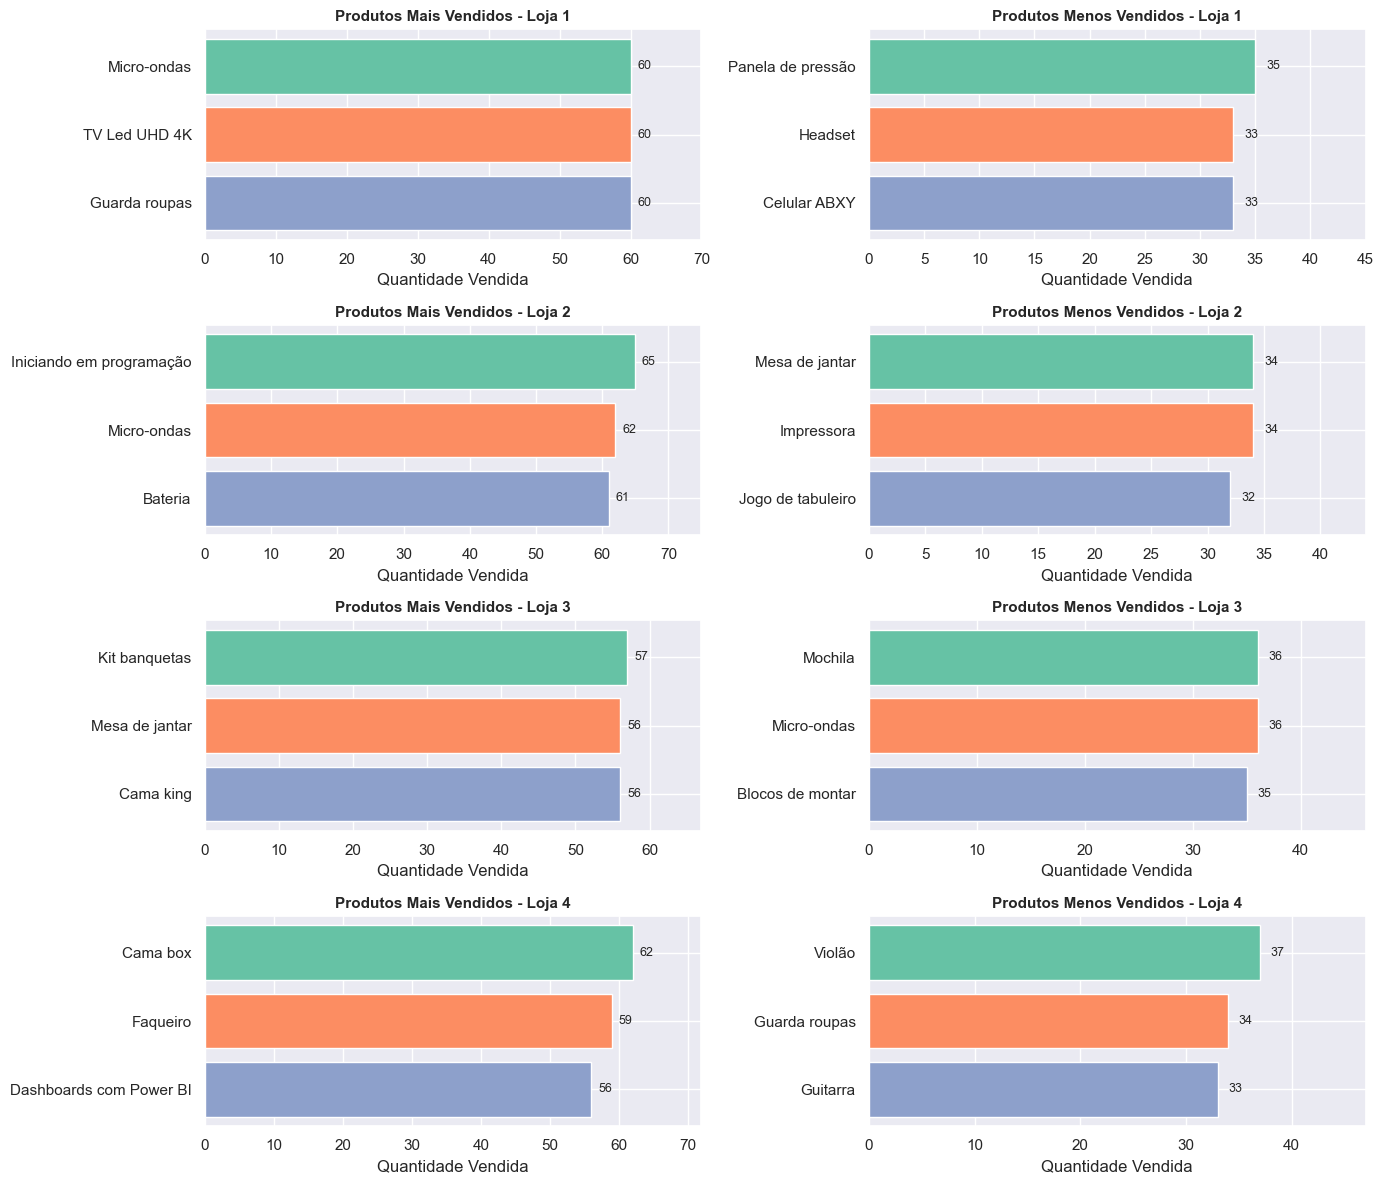

In [204]:
def grafico_produtos_vendidos(df, lojas):
    sns.set(style="darkgrid")
    cores = sns.color_palette('Set2')

    fig, axs = plt.subplots(len(lojas), 2, figsize=(14, 12))  # 3 lojas, 2 colunas

    for i, (df, loja) in enumerate(zip(df, lojas)):
        produtos_mais_vendidos = df['Produto'].value_counts().head(3)
        produtos_menos_vendidos = df['Produto'].value_counts().tail(3)

        # Mais vendidos
        axs[i, 0].barh(produtos_mais_vendidos.index, produtos_mais_vendidos.values, color=cores)
        axs[i, 0].set_title(f'Produtos Mais Vendidos - {loja}', fontsize=11, weight='bold')
        axs[i, 0].set_xlabel('Quantidade Vendida')
        axs[i, 0].invert_yaxis()
        axs[i, 0].set_xlim(0, produtos_mais_vendidos.values.max() + 10)

        for j, valor in enumerate(produtos_mais_vendidos.values):
            axs[i, 0].text(valor + 1, j, str(valor), va='center', fontsize=9)

        # Menos vendidos
        axs[i, 1].barh(produtos_menos_vendidos.index, produtos_menos_vendidos.values, color=cores)
        axs[i, 1].set_title(f'Produtos Menos Vendidos - {loja}', fontsize=11, weight='bold')
        axs[i, 1].set_xlabel('Quantidade Vendida')
        axs[i, 1].invert_yaxis()
        axs[i, 1].set_xlim(0, produtos_menos_vendidos.values.max() + 10)

        for j, valor in enumerate(produtos_menos_vendidos.values):
            axs[i, 1].text(valor + 1, j, str(valor), va='center', fontsize=9)
    plt.savefig('imagem.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

dados = [loja1, loja2, loja3, loja4]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
grafico_produtos_vendidos(dados, lojas)


# 5. Frete Médio por Loja


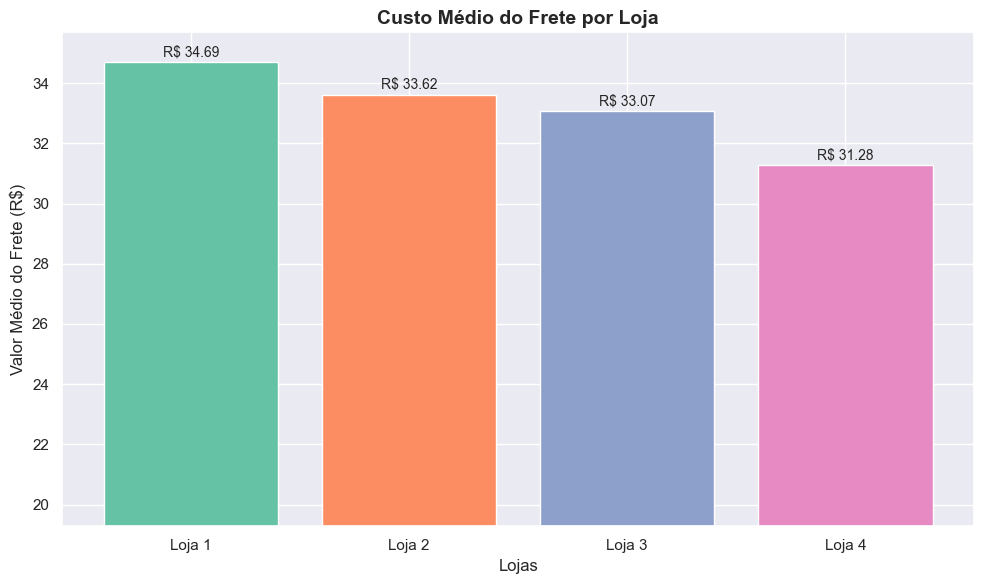

In [108]:
dicionario_media_frete_lojas = {
    'Loja 1': loja1['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

lojas = list(dicionario_media_frete_lojas.keys())
valores = list(dicionario_media_frete_lojas.values())

sns.set(style="darkgrid")
cores = sns.color_palette('Set2')

# Limites do eixo Y ajustados para focar nas médias
y_min = min(valores) - 12
y_max = max(valores) + 1

plt.figure(figsize=(10, 6))
barras = plt.bar(lojas, valores, color=cores)

# Título e eixos
plt.title('Custo Médio do Frete por Loja', fontsize=14, weight='bold')
plt.xlabel('Lojas')
plt.ylabel('Valor Médio do Frete (R$)')
plt.ylim(y_min, y_max)

# Valores em cima das barras
for i, valor in enumerate(valores):
    plt.text(i, valor + 0.1, f'R$ {valor:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 6. Distribuição Geográfica das Vendas por Categoria de Produto

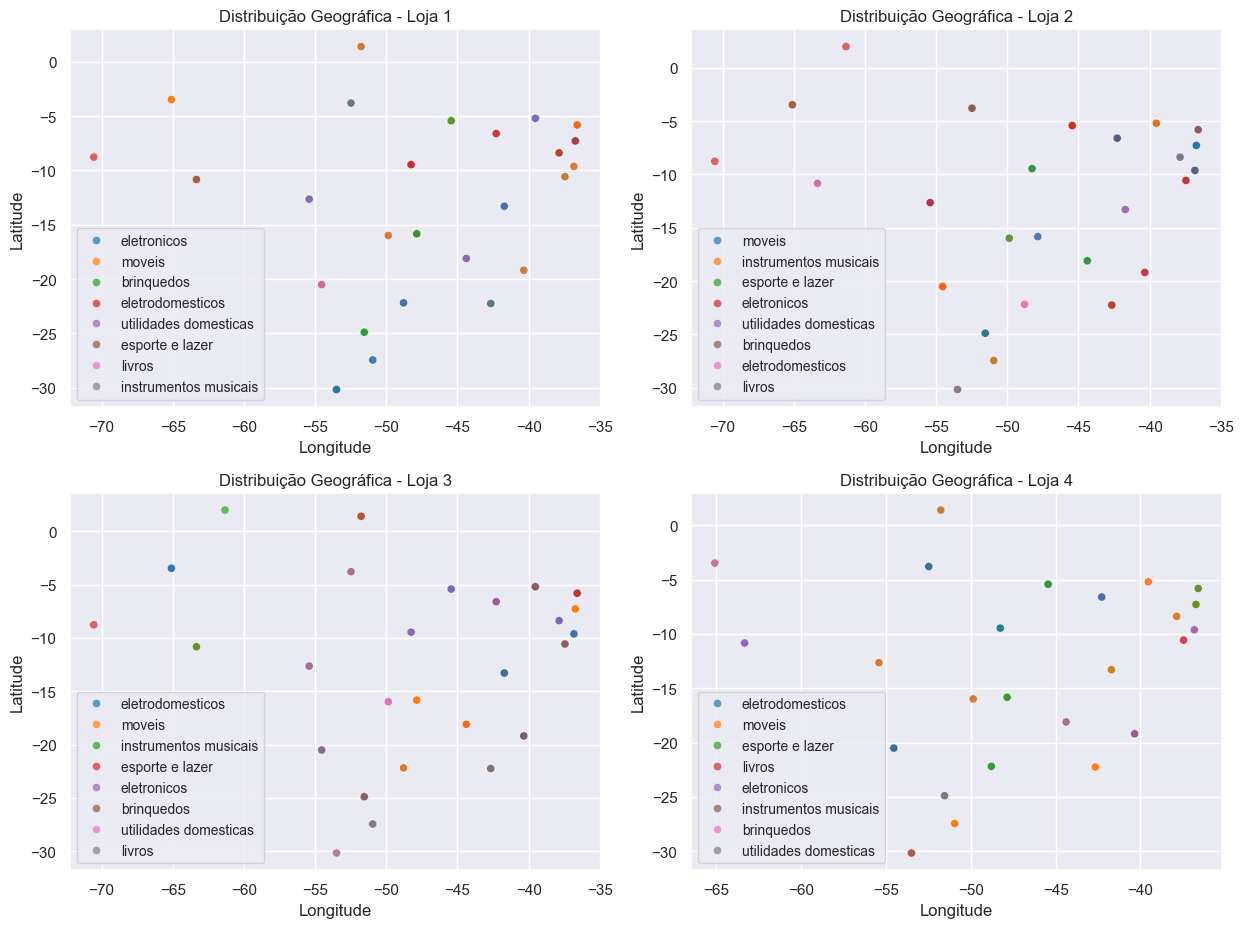

In [188]:
def graficos_dispersao(loja1, loja2, loja3, loja4):
    lojas = [loja1, loja2, loja3, loja4]
    nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

    fig, axes = plt.subplots(2, 2, figsize=(12.6, 9.45))
    axes = axes.flatten()

    for i in range(4):
        sns.scatterplot(data=lojas[i], x='lon', y='lat', hue='Categoria do Produto',
                        palette='tab10', alpha=0.7, ax=axes[i])
        axes[i].set_title(f'Distribuição Geográfica - {nomes[i]}')
        axes[i].set_xlabel('Longitude')
        axes[i].set_ylabel('Latitude')
        axes[i].grid(True)
        axes[i].legend(fontsize='small')

    plt.tight_layout()
    plt.show()

graficos_dispersao(loja1, loja2, loja3, loja4)

### Tabela Comparativa

In [158]:
tabela_comparativa = pd.DataFrame({
    'Métrica': [
        'Faturamento (R$)',
        'Categoria Mais Vendida',
        'Média de Avaliação',
        'Produto mais Vendido',
        'Produto menos Vendido',
        'Frete Médio (R$)'
    ],
    'Loja 1': [
        faturamento_loja1,
        loja1.groupby('Categoria do Produto').size().idxmax(),
        round(loja1['Avaliação da compra'].mean(), 2),
        loja1['Produto'].value_counts().idxmax(),
        loja1['Produto'].value_counts().idxmin(),
        round(loja1['Frete'].mean(), 1)
    ],
    'Loja 2': [
        faturamento_loja2,
        loja2.groupby('Categoria do Produto').size().idxmax(),
        round(loja2['Avaliação da compra'].mean(), 2),
        loja2['Produto'].value_counts().idxmax(),
        loja2['Produto'].value_counts().idxmin(),
        round(loja2['Frete'].mean(), 1)
    ],
    'Loja 3': [
        faturamento_loja3,
        loja3.groupby('Categoria do Produto').size().idxmax(),
        round(loja3['Avaliação da compra'].mean(), 2),
        loja3['Produto'].value_counts().idxmax(),
        loja3['Produto'].value_counts().idxmin(),
        round(loja3['Frete'].mean(), 1)
    ],
    'Loja 4': [
        faturamento_loja4,
        loja4.groupby('Categoria do Produto').size().idxmax(),
        round(loja4['Avaliação da compra'].mean(), 2),
        loja4['Produto'].value_counts().idxmax(),
        loja4['Produto'].value_counts().idxmin(),
        round(loja4['Frete'].mean(), 1)
    ]
})

tabela_comparativa

,Métrica,Loja 1,Loja 2,Loja 3,Loja 4
0,Faturamento (R$),1534509.12,1488459.06,1464025.03,1384497.58
1,Categoria Mais Vendida,moveis,moveis,moveis,moveis
2,Média de Avaliação,3.98,4.04,4.05,4.0
3,Produto mais Vendido,Micro-ondas,Iniciando em programação,Kit banquetas,Cama box
4,Produto menos Vendido,Headset,Jogo de tabuleiro,Blocos de montar,Guitarra
5,Frete Médio (R$),34.7,33.6,33.1,31.3


# Relatório de Análise: Escolha da Loja a Ser Vendida

### Introdução

O objetivo deste relatório é analisar quatro lojas com base em diversos fatores de desempenho para recomendar a loja que o Senhor João deve vender. A análise foi realizada considerando o faturamento total de cada loja, as categorias de produtos mais e menos vendidas, a média das avaliações dos clientes, os produtos mais e menos vendidos e o frete médio cobrado por cada loja. A decisão será fundamentada na comparação desses fatores, buscando identificar qual loja se destaca em termos de resultados financeiros, satisfação dos clientes e eficiência operacional.

### Desenvolvimento

### 1. Faturamento Total das Lojas

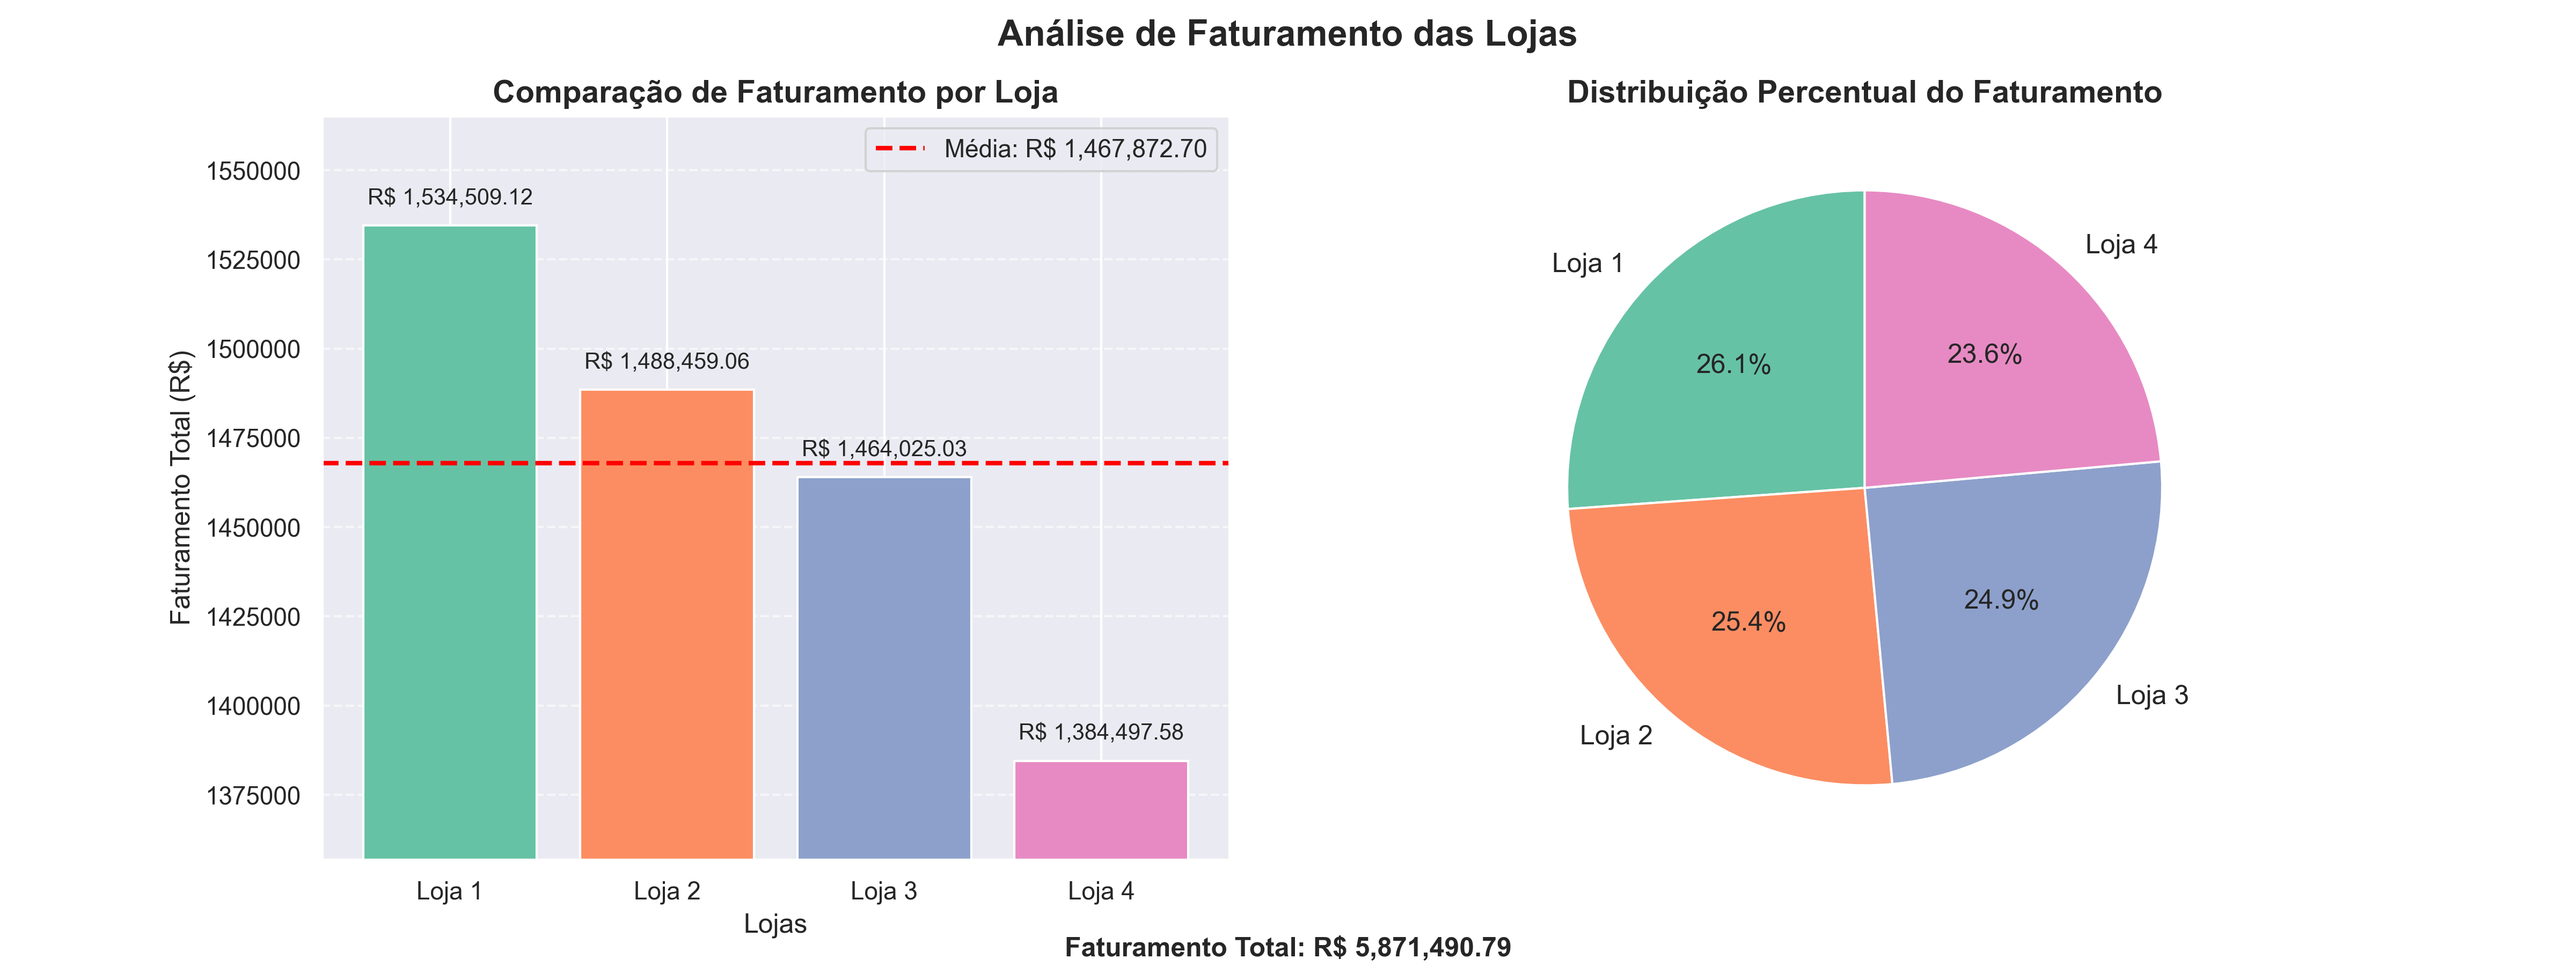

O faturamento total mostra que a Loja 1 é a mais lucrativa, seguida pela Loja 2 e Loja 3, com a Loja 4 apresentando o menor faturamento. Essa análise inicial sugere que a Loja 1 tem o melhor desempenho financeiro.

### 2. Categorias de Produtos Mais e Menos Vendidos

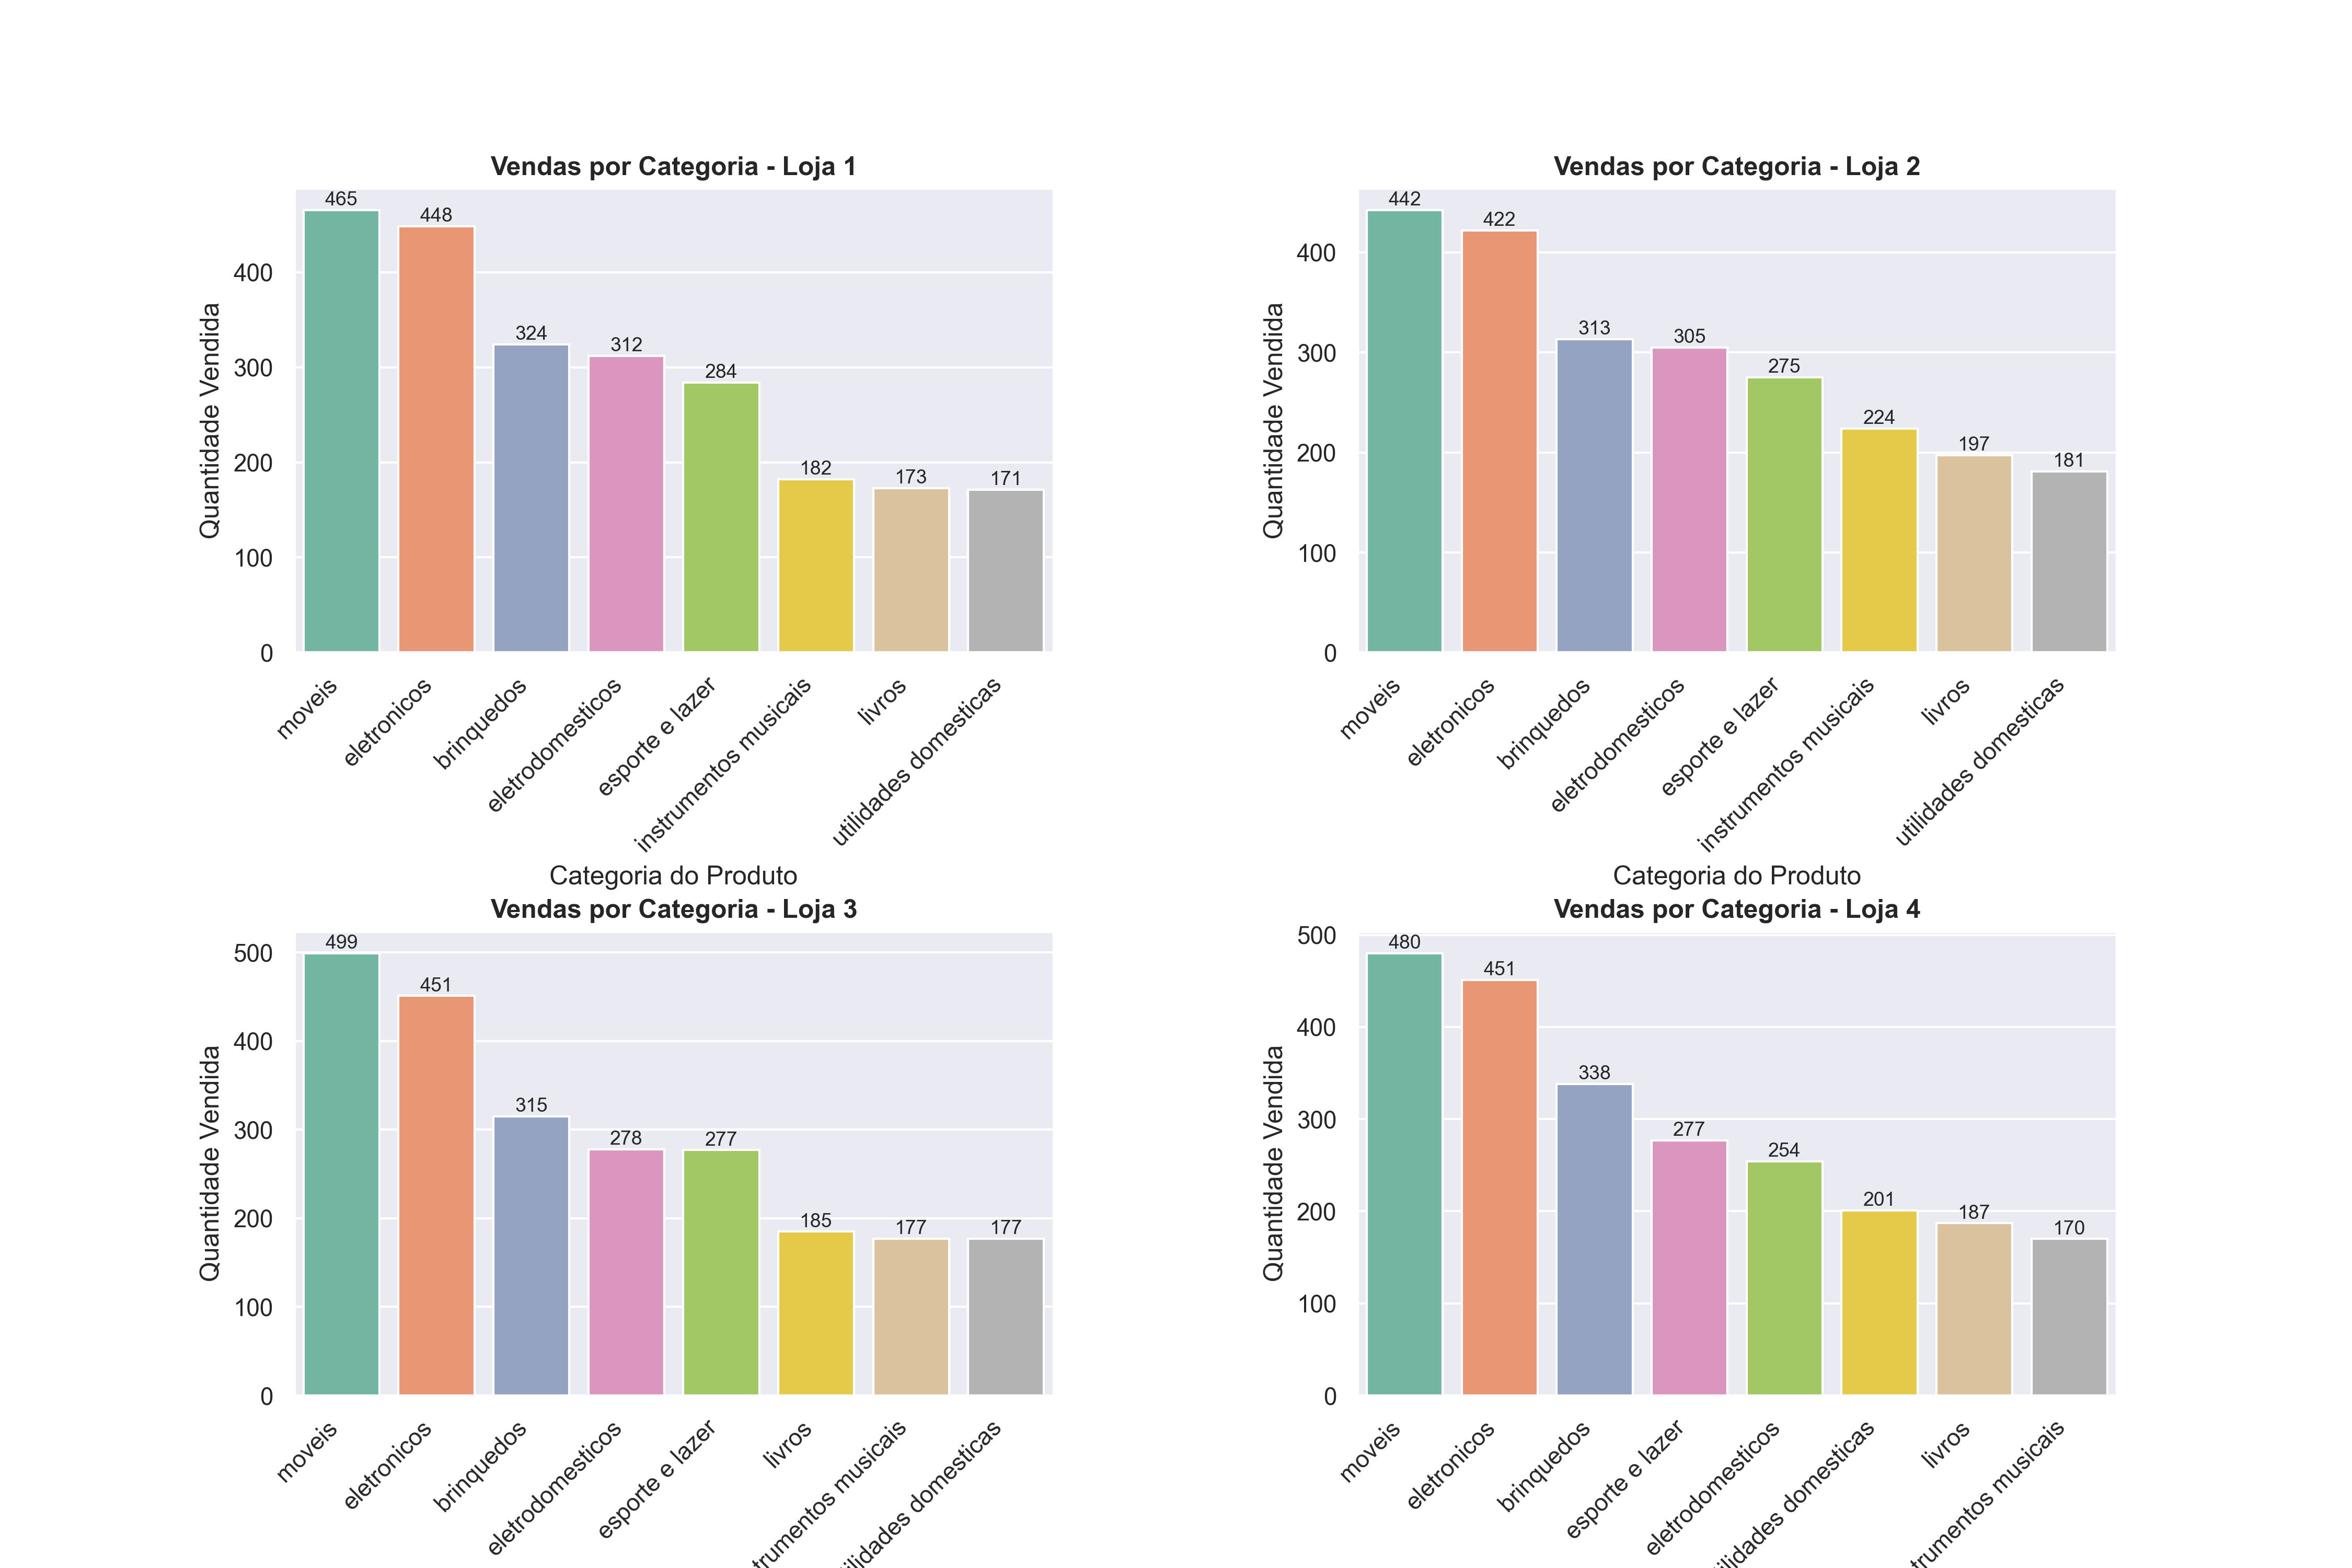

As categorias mais vendidas nas quatro lojas são móveis e eletrônicos, o que indica que a demanda por esses produtos é forte. A Loja 1, por exemplo, tem o micro-ondas como o produto mais vendido, o que se alinha com a demanda por eletrônicos, enquanto a Loja 4 tem a cama box, um item de móveis, como o mais vendido.

### 3. Média das Avaliações de Clientes

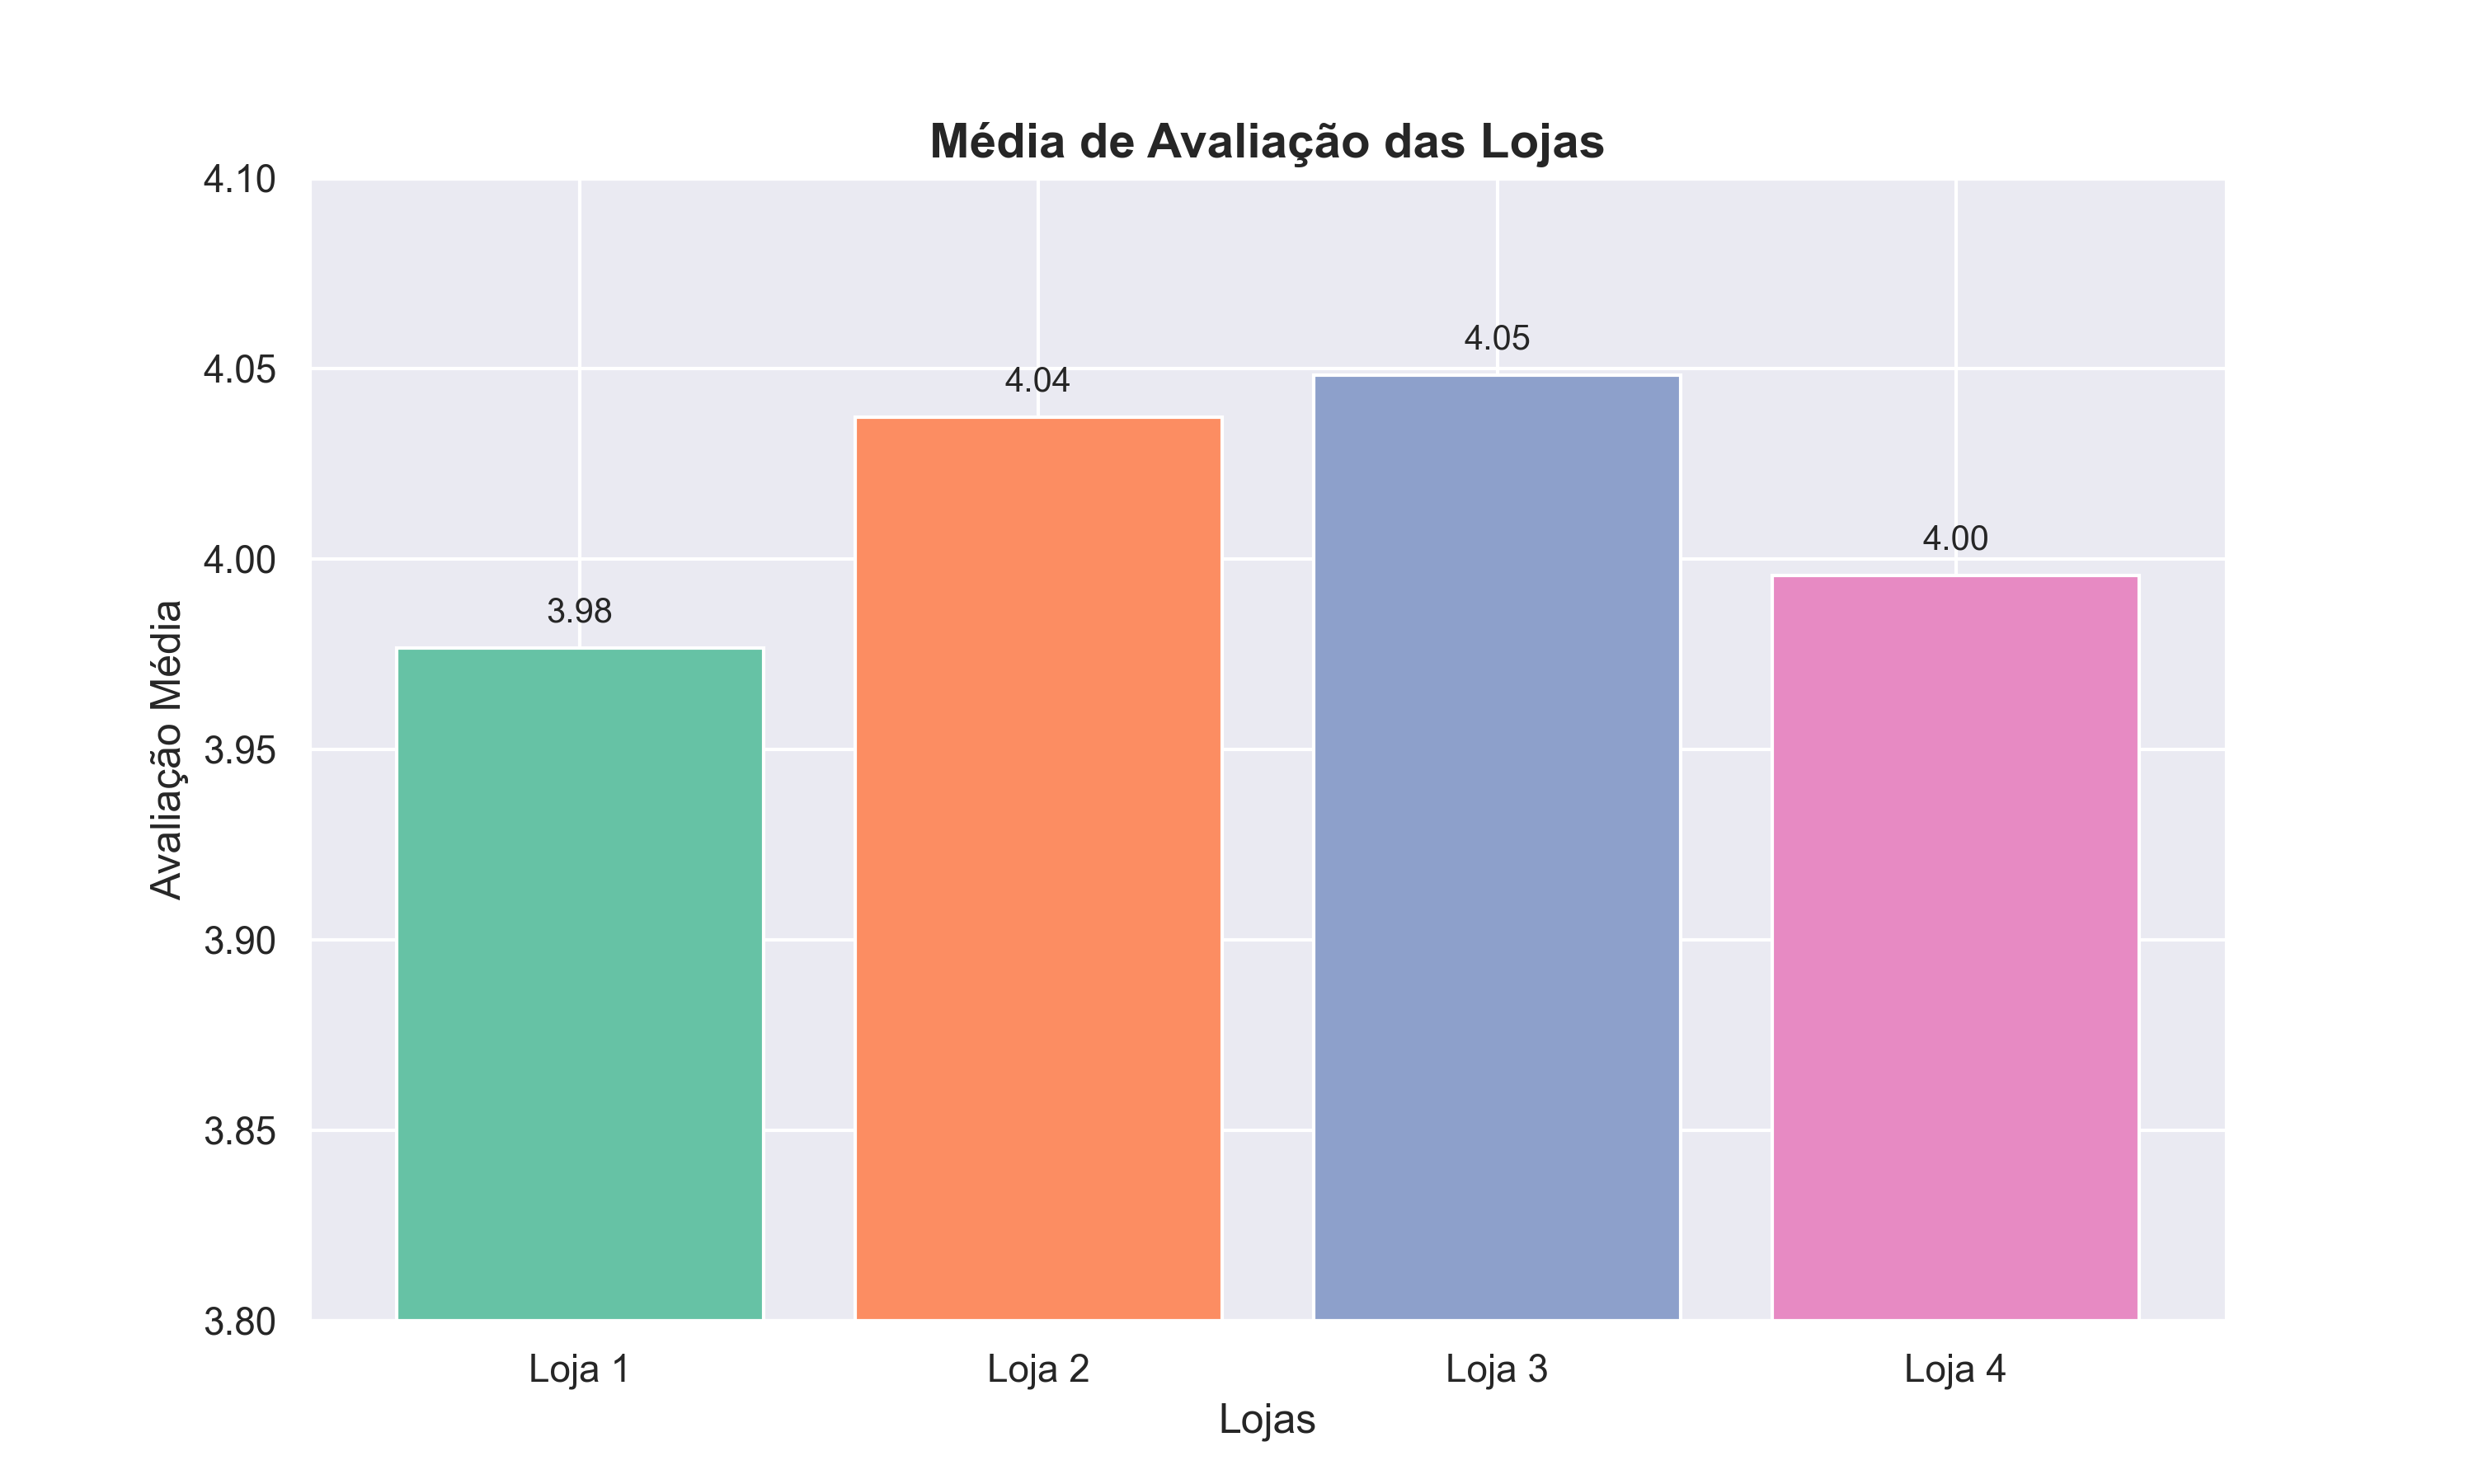

A Loja 3 apresenta a média mais alta de avaliações, com 4.05, seguida pela Loja 2 com 4.04 e a Loja 4 com 4.00. A Loja 1 tem a menor média de avaliações (3.98), o que pode indicar uma menor satisfação dos clientes em comparação com as outras lojas.

### 4. Produtos Mais e Menos Vendidos por Loja

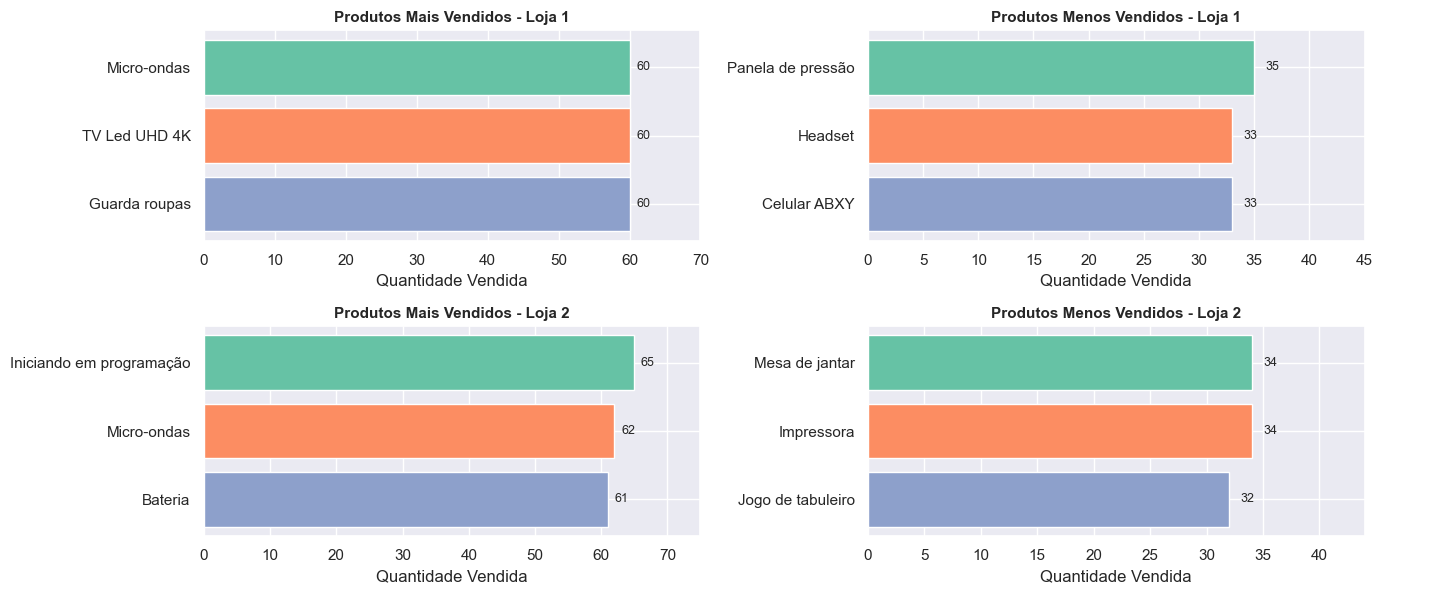

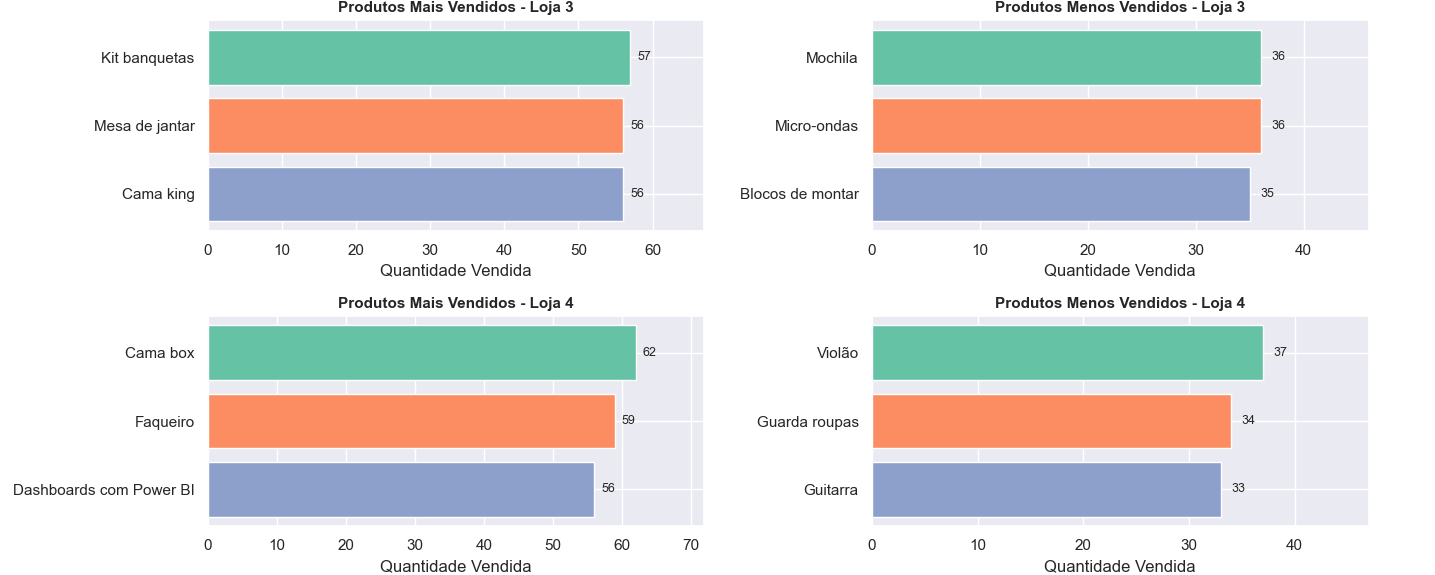

* Loja 1: Mais vendido: Micro-ondas / Menos vendido: Headset

* Loja 2: Mais vendido: Iniciando em programação / Menos vendido: Jogo de tabuleiro

* Loja 3: Mais vendido: Kit banquetas / Menos vendido: Blocos de montar

* Loja 4: Mais vendido: Cama box / Menos vendido: Guitarra

Cada loja apresenta um produto mais vendido que se alinha bem com as categorias populares, como móveis e eletrônicos. No entanto, o produto menos vendido pode indicar uma baixa demanda em determinados segmentos, como o headset na Loja 1 e a guitarra na Loja 4.

### 5. Frete Médio de Cada Loja

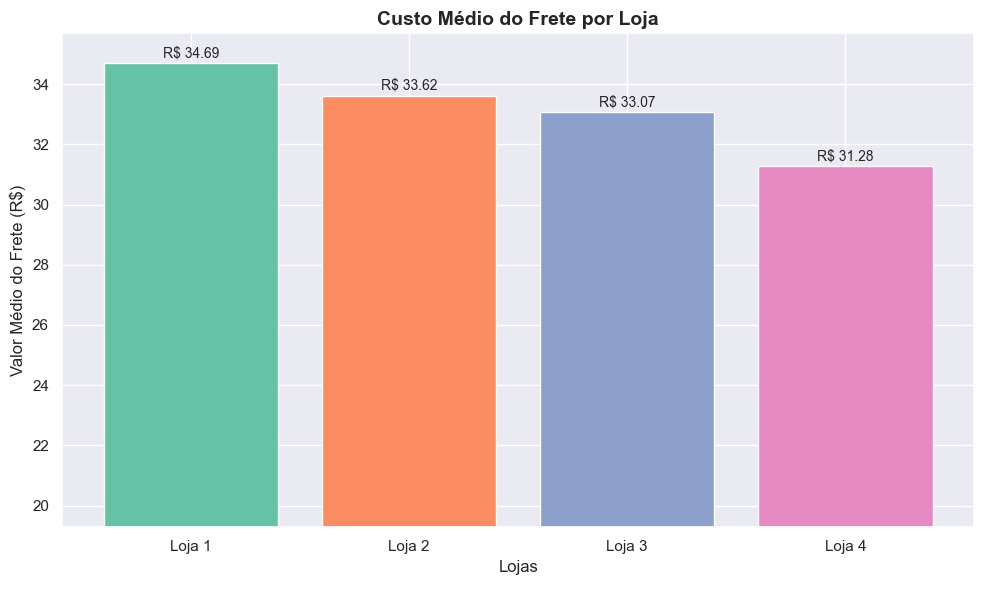

O frete médio é um fator importante na decisão de compra do cliente, pois afeta diretamente o custo final. A Loja 4 apresenta o menor frete médio, o que pode torná-la mais atraente para os clientes em termos de custos de envio. As lojas Loja 3, Loja 2 e Loja 1 possuem fretes mais altos, com a Loja 1 sendo a mais cara.

### Análise de Desempenho Geográfico

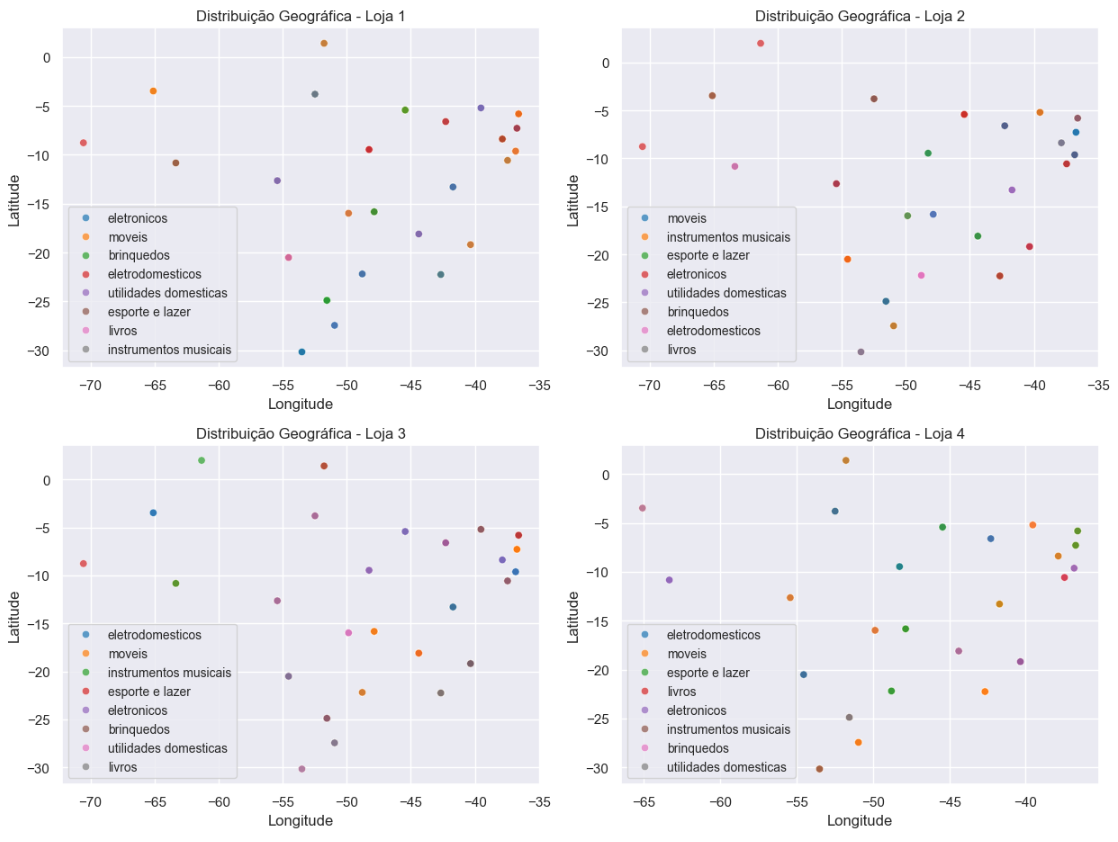

Loja 1:

* Apresenta boa diversidade regional, com vendas distribuídas por diferentes estados, especialmente no Sudeste e Centro-Oeste.
* A presença de categorias variadas em diferentes regiões sugere uma boa penetração de mercado e operação logística funcional.
* Cobre bem os estados de SP, MG, RJ e até áreas do Nordeste, como BA e PE.

Loja 2:

* Também tem distribuição geográfica ampla, embora haja maior concentração de pontos no Sudeste.
* Vendas de móveis, instrumentos musicais e eletrônicos aparecem espalhadas, sugerindo um público diversificado.
* A presença de produtos de maior valor e alto frete em diversas regiões pode elevar os custos logísticos.

Loja 3:

* A Loja 3 se destaca por estar bem distribuída geograficamente, incluindo regiões como Sul, Sudeste, Nordeste e Norte.
* Isso indica uma estrutura logística sólida, sendo capaz de entregar produtos de diferentes categorias para diversas localidades.
* Essa capilaridade pode ser um diferencial competitivo importante.

Loja 4:

* Apesar de ter boa cobertura no Sudeste e Centro-Oeste, sua distribuição é ligeiramente mais concentrada
* Observa-se presença de categorias como livros, esportes e eletrodomésticos em regiões próximas, o que pode indicar foco regionalizado.
* Essa limitação pode restringir o crescimento e diversificação no futuro.

### conclusão

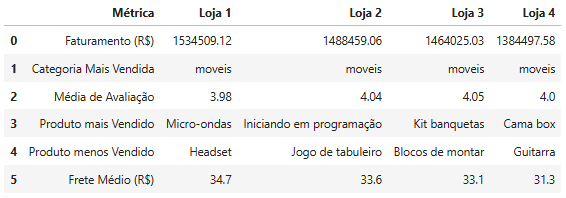

Com base na análise dos dados apresentados, a recomendação é que o Senhor João venda a Loja 4. Essa decisão é sustentada pelos seguintes fatores:

* Menor Faturamento: A Loja 4 apresenta o menor faturamento entre todas (R$ 1.384.497,58), o que demonstra um desempenho financeiro abaixo das demais.

* Menor Destaque em Produtos: Embora o produto mais vendido da Loja 4 (cama box) esteja alinhado com as categorias populares (móveis), seu produto menos vendido (guitarra) pode indicar baixa aceitação de certos nichos. Isso evidencia um mix de produtos que pode não estar tão bem ajustado quanto nas outras lojas.

* Avaliação Mediana: A média de avaliação da Loja 4 (4.00) é ligeiramente superior à da Loja 1 (3.98), mas inferior à das Lojas 2 (4.04) e 3 (4.05). Isso sugere que a experiência do cliente, embora razoável, não se destaca.

* Frete como Único Destaque: O único ponto realmente forte da Loja 4 é o frete médio mais baixo (R$ 31.3). No entanto, esse diferencial isolado não compensa o baixo faturamento e o desempenho geral.

* A Loja 4 possui uma distribuição mais concentrada geograficamente, com menos presença em regiões afastadas ou estratégicas como o Norte e Nordeste. Essa limitação de alcance regional reduz o potencial de crescimento e a escalabilidade do negócio.

Dessa forma, vender a Loja 4 permitirá ao Senhor João capitalizar sobre o valor ainda existente nela e reinvestir esse recurso nas demais lojas, que apresentam melhor desempenho e maior potencial de crescimento. Ao focar nas Lojas 1, 2 e 3 — que têm melhores indicadores de faturamento, avaliações e alinhamento com as categorias mais vendidas — João poderá fortalecer sua operação, aumentar sua margem de lucro e melhorar a experiência do cliente nas lojas restantes.